## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: Edward Day
    - Email: Edward.Day1337@gmail.com
- Group member 2
    - Name: Sahar Siddiqi
    - Email: 
- Group member 3
    - Name: NA
    - Email: NA
- Group member 4
    - Name: NA
    - Email: NA

### Additional submission comments
- Tutoring support received: Ali Jazayeri , Jacob Rosen , Palash Pandey 
- Other (other):Sahar Siddiqi ss5226@drexel.edu

# Assignment group 3: Probabilistic modeling and prediction

## Module A _(55 pts)_ Optimizing for predicted separation
__Data.__ For this module we'll be working with the basic baseball player heights and weights from the lecture notes. These are packaged in the following location:

- `"./data/baseball_heightweight.csv"`

__Overview.__ The purpose of this module is to provide experience with optimization and to view/investigate a different optimizable functions (from error). In the __Chapter 5.__ lecture notes we investigated the sum of squared errors as a function of (linear) model parameters. This made the goal of optimization (executed through gradient descent) into a 'fitting' procedure, i.e., describing a pattern that data follow.

Another way we can use a line is as a 'separator': supposing some data $x_1, \cdots, x_n$ have labels $y_1, \cdots, y_n$ falling into two classes (coded as $\pm 1$), which set of line-defining $w$ and $b$ parameters separate the points the best. Check out the picture  below for an intution (note: their $b$ is our $-b$).

Note: even though we're talking about 'lines', and actually working with true, 2-dimensional lines throughout this module, it's important to think/code throughout this module with the expectation that each data point $x_i$ will have $m$ (potentially greater than 2) dimensions. When $m>3$, a 'line' technically refers to a plane, but after we leave the comfort of 3-dimensionality our 'lines' are technically _hyperplanes_, for which we have little experiential intuition. Hence, we'll adopt the terminology 'line' throughout, since this provides the strongest grounding of intuition.

![SVM Margin](./images/SVM_margin.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__A1.__ _(7 pts_) To get things started: 

1. load the baseball player data with pandas into a dataframe called `bball`;
2. filter `bball` to contain only those rows that correspond to shortstops and catchers;
3. create an `.array()` called `y_bball` of labels, containing a `1` for each catcher and a `-1` for each shortstop;
4. filter the remaining rows of `bball` to only the `Height` and `Weight` columns; and
5. standardize the columns of `bball` and exhibit the first 10 rows.

In [3]:
bball = pd.read_csv("./data/baseball_heightweight.csv" , sep = ",")
bball


,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [3]:
filt = bball.loc[(bball['Position']=='Catcher')| (bball['Position']=='Shortstop')]
print(filt)

                 Name Team   Position  Height  Weight    Age
0       Adam_Donachie  BAL    Catcher      74   180.0  22.99
1           Paul_Bako  BAL    Catcher      74   215.0  34.69
2     Ramon_Hernandez  BAL    Catcher      72   210.0  30.78
6       Miguel_Tejada  BAL  Shortstop      69   209.0  30.77
35    A.J._Pierzynski  CWS    Catcher      75   245.0  30.17
...               ...  ...        ...     ...     ...    ...
969   Eliezer_Alfonzo   SF    Catcher      72   223.0  28.06
974      Omar_Vizquel   SF  Shortstop      69   175.0  39.85
1002     Gary_Bennett  STL    Catcher      72   208.0  34.87
1003    Yadier_Molina  STL    Catcher      71   225.0  24.63
1008   David_Eckstein  STL  Shortstop      67   165.0  32.11

[128 rows x 6 columns]


In [4]:

ybsall = np.array(filt['Position'])
ybsall[ybsall =='Catcher'] = 1
ybsall[ybsall =='Shortstop'] = -1
print(ybsall)

[1 1 1 -1 1 1 -1 -1 1 1 1 -1 -1 1 1 1 -1 -1 1 1 -1 1 1 1 -1 -1 -1 1 1 -1 1
 1 -1 -1 -1 1 1 -1 -1 1 1 1 -1 1 1 -1 -1 1 1 1 1 -1 -1 1 1 -1 -1 1 1 1 -1
 1 1 -1 -1 1 1 1 -1 1 1 -1 -1 1 1 -1 -1 1 1 1 -1 -1 1 1 1 -1 -1 1 1 -1 -1
 1 1 1 -1 1 1 -1 1 1 1 1 -1 1 1 1 1 -1 -1 -1 1 1 -1 -1 1 1 -1 -1 -1 1 1 -1
 1 1 -1 1 1 -1]


In [5]:
def standardize(bball):
    mean = np.mean(bball)
    stdev = np.std(bball)
    
    standardized_data = (bball - mean) / stdev
    
    return standardized_data

In [6]:
bball.filter(['Height', 'Weight'])


,Height,Weight
0,74,180.0
1,74,215.0
2,72,210.0
3,72,210.0
4,73,188.0
...,...,...
1029,73,190.0
1030,74,180.0
1031,75,205.0
1032,75,190.0


In [7]:
bball

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [8]:
s_heights = filt["Height"] = standardize(filt["Height"])
s_weights = filt["Weight"] = standardize(filt["Weight"])
x = filt[["Height","Weight"]]
x.head(10)


C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Height,Weight
0,0.890083,-0.848435
1,0.890083,1.051109
2,-0.216040,0.779746
6,-1.875224,0.725473
35,1.443145,2.679290
36,1.443145,2.407927
39,-0.769101,-1.119798
40,0.890083,0.182746
68,0.890083,1.322473
69,-0.216040,-0.848435


bball["Height"] = standardize(bball["Height"])
bball["Weight"] = standardize(bball["Weight"])
bball["Age"] = standardize(bball["Age"])

bball.head(11)

__A2.__ _(5 pts)_ Since our goal with this problem will be to draw a line that separates the catchers from the shortstops, write and execute a function called 

- `plot_data_boundary(data, y)` 

that creates a scatter plot of the standardized heights and weights where the points are color coded with shortstops as black circles and catchers as red squares. In the response box below, disucss how well you think a line can separate these data.

_Response._ 

In [9]:
def plot_data_boundary(data, y):
    
    plt.plot(data.iloc[y==1,0],data.iloc[y==1,1],'rs', label = 'Catcher')
    plt.plot(data.iloc[y==-1,0],data.iloc[y==-1,1],'ko', label = 'Shortstop')
    plt.legend()
    plt.xlabel('Standardized Heights')
    plt.ylabel('Standardized Weights')
    plt.title('Heights and Weights of S.S and Catchers')
    

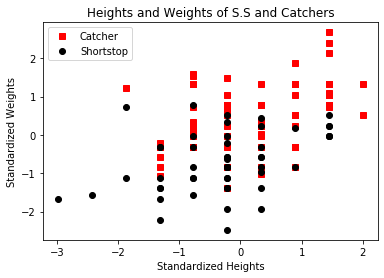

In [10]:
plot_data_boundary(x, ybsall)

__A3.__ _(5 pts)_ The way we'll be drawing lines (hyperplanes) in this problem uses what's called the 'standard form'. Supposing we have vectors (rows) of features (columns) $x = [x_1, \cdots, x_m]$, a linear relationship is defined by a vector of weights $w = [w_1,\cdots,w_m]$ and an intercept $b$ in the form:
$$
w\cdot x + b = 0
$$
Since our data only has two columns, we can re-arrange into slope-intercept form:
$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$$
to conveniently plot a line in standard form. 

So, modify your `plot_data_boundary()` function to accept a `w` (a vector) and `b` (a scalar) arguments and plot the corresponding line over the range of $x_1$ values using the slope-intercept form above. 

When complete, select you own $w$ and $b$ parameters and use your function to exhibit a corresponding line over the problem's data. Then, disucuss how well the line separates the two (catcher and shortstop) classes in the response box below.

_Response._ 

In [11]:
#to do this, we are simply coding the formual of x2. 
def plot_data_boundary(data,y,w,b):
    
    plt.plot(data.iloc[y==1,0],data.iloc[y==1,1],'rs', label = 'Catcher')
    plt.plot(data.iloc[y==-1,0],data.iloc[y==-1,1],'ko', label = 'Shortstop')
    plt.legend()
    plt.xlabel('Standardized Heights')
    plt.ylabel('Standardized Weights')
    plt.title('Heights and Weights of S.S and Catchers')
    plt.plot(data['Weight'], w[0]/w[1]*data['Weight']-(b/w[1]), 'b')

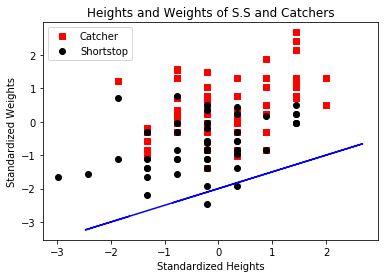

In [12]:
z = plot_data_boundary(x, ybsall,[1,2],4)
z

__A4.__ _(3 pts)_ Now, for any point $x$ on the line defined by $w$ and $b$, the following relationship holds:
$$
w\cdot x + b = 0
$$

But our points probably don't lie exactly on a line. To tell which sides of the line they fall on, we can just look at the sign the left hand side of the equation above:

- $x$ is above the line:
    - $\hat{y} = w\cdot x_i + b > 0$ 
- $x$ is below the line:
    - $\hat{y} = w\cdot x_i + b < 0$

What we're hoping to do is have all $x$'s either have $y,\hat{y} < 0$ or $y,\hat{y} > 0$. One way to test if a point is 'correctly' separated is if $y\hat{y} > 0$, so use this test ($y\hat{y} > 0$ means 'separated') to write a function called 
- `separated(data, y, w, b)`

that outputs a boolean mask of $n$ values where `True` corresponds to a point falling on the correct side of the line ($y\hat{y} > 0$). When this is done, use your functon to calculate/report the percent of points your line correctly separated below.

In [13]:
def separated(data,y,w,b):
    v = data.as_matrix()
    yhatt = data.dot(w)+b
    x = yhatt*y > 0
    return x

In [14]:
a= separated(x, ybsall,[1,2],2)
#t = [istrue for istrue in a if istrue == True]
sum(a)/len(a)

C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0.71875

__A5.__ _(3 pts)_ Now that we have our `separated()` function, use it to modify your `plot_data_boundary()` function into a new one called:
- plot_separated(data, y, w, b)

which plots the same points and line as before, but now color codes them for _correctness of separation_ as well label. In particular, organize your points as follows:
- indicate correctly separated negative points (shortstops) with black circles, 
- indicate incorrectly separated negative points (shortstops) with green triangles, 
- indicate correctly separated positive points (catchers) with red squares, and
- indicate incorrectly separated positive points (catchers) with yellow diamonds.

In [56]:
#  is_sep = separated(data, y, w, b)
#     not_sep = np.logical_not(is_sep)

def plot_separated(data,y,w,b):
    scat_fig = plt.figure(figsize = (6, 6))
    plt.plot(data.iloc[y==1,0],data.iloc[y==1,1],'rs', label = 'Catcher')
    plt.plot(data.iloc[y==-1,0],data.iloc[y==-1,1],'ko', label = 'Shortstop')
    plt.plot(data.iloc[y==1,0],data.iloc[y==1,1],'g^', label = 'Catcher')
    plt.plot(data.iloc[y==-1,0],data.iloc[y==-1,1],'yd', label = 'Shortstop')
  
    


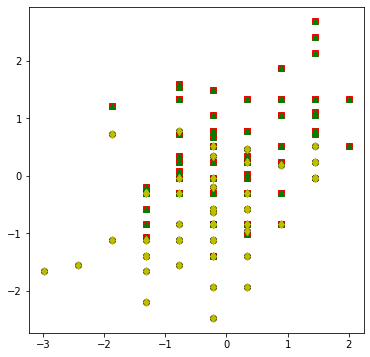

In [57]:
plot_separated(x,ybsall,[1,2],2)

__A6.__ _(5 pts)_ Now, most of all we'll want to reduce the number of points $x$ for which our prediction $\hat{y}$ has a different sign from the true label $y$. In these (bad) cases, one will have $y\hat{y} < 0$.

However, 'edge cases' are bad, too, and since we've provided our points with unit ($y = \pm 1$) labels it's also important to pay attention to points whose prediction have correct sign ($y\hat{y} > 0$), but are close to the boundary (here, within one unit):

$$
y(w\cdot x + b) = y\hat{y} < 1
$$

Thus, our objective function will seek to _maximize_ the distance between our $(w,b)$ separating line (plane) and 'bad' points holding the relationship $y(w\cdot x + b) = y\hat{y} < 1$. So, for a given plane $(w,b)$ and $n$ `data` points $x_i: i=1,\cdots n$, we'll be working with a subset of $k$ 'bad' points: $x_{i_\ell}:\ell=1,\cdots k$. To identify these, write a function:

- `bad_points(data, y, w, b)`

that takes `data` of $n$ rows and $m$ columns/features, line-defining parameters $w$ (a vector of $m$) and $b$ (a scalar), and outputs a boolean mask positively identifying the 'bad points' using a boolean mask, i.e., those for which:

$$
y(w\cdot x + b) = y\hat{y} < 1
$$

Note: this function is very similar to the requested `separated()` in __A4__.

When this is complete, exhibit this function's output using the line you selected in __A3__.

In [17]:
def bad_points(data, y, w, b):
    return y * (data.dot(np.array(w))+b) < 1
bad_points(x,ybsall,[1,2],3)

0       False
1       False
2       False
6        True
35      False
        ...  
969     False
974     False
1002    False
1003    False
1008    False
Length: 128, dtype: bool

__A7.__ _(4 pts)_ "How bad" a point is, is defined by distance&mdash;between our line (hyperplane) and the point. For a given point $x$ and line defined by $w$ and $b$, the distance is:
$$
d(x;w, b) = \frac{|w\cdot x + b|}{\|w\|}
$$
But since being on the wrong side (having the wrong sign) is extra bad, it's actually the signed distances we care about:
$$
d(x;w, b)_\text{sgn} =\frac{y(w\cdot x + b)}{\|w\|}
$$
This makes the sum of signed distances for the 'bad points' we've found into our objective function, which we'll aim to maximize:
$$
\begin{align*}
   D (X; w, b) 
   = &\sum_{\ell=1}^k d_\text{sgn}(x_{i_\ell};w, b) \\
   = &\sum_{\ell=1}^k \frac{y_{i_\ell}(w\cdot x_{i_\ell}+ b)}{\|w\|}
\end{align*}
$$

Since this is our objective function, express it's gradient components with respect to the parameters $b$ and $w_j$ (for any $j$ of the $m$ features) in the response box below.

_Response_.
$$
\nabla_b(D) = \frac{1}{\|w\|} \sum_{\ell=1}^k (y_{i_\ell})
$$
$$
\nabla_{w_j}(D) = \frac{1}{\|w\|} \sum_{\ell=1}^k (y_{i_\ell}x_{i_\ell})
$$

__A7.__ _(5 pts)_ Now that we have a formula for our gradient, it's time to write a function that computes it for an arbitrary set of points and plane. Use your above formulae to write a function:

- `gradient(data, y, w , b)`

that takes $w$, $b$, and a `data` matrix of $x_i$ rows, and computes the gradient for the $m + 1$ parameters.

When complete, exhibit this function's output using the line you exhibited in __A3__.

In [18]:
x

,Height,Weight
0,0.890083,-0.848435
1,0.890083,1.051109
2,-0.216040,0.779746
6,-1.875224,0.725473
35,1.443145,2.679290
...,...,...
969,-0.216040,1.485291
974,-1.875224,-1.119798
1002,-0.216040,0.671201
1003,-0.769101,1.593836


In [19]:
x_mat = x.as_matrix()
def gradient(data,y,w,b):
    norm = np.linalg.norm(w)
    b_point = bad_points(data, y, w, b)
    g_b = sum(y[:,None][b_point]/norm)
    g_w = sum((data * y[:,None])[b_point])/norm
    return g_w,g_b
    
gradient(x_mat,ybsall,[1,2],2)
    

C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(array([-6.53123330149088, 1.721379416514338], dtype=object),
 array([-9.83869910099908], dtype=object))

__A8.__ _(10 pts)_ Finally, it's time to pull things together into a gradient descent application. Specifically, create a function called 
- `GD(data, y, w, b, eta=0.001, iter_num=1000, threshold=0.001)`
that accepts the following arguments:

- `data`: a matrix of $n$ row/data points by $m$ feature/columns
- `y`:  an array of $n$ $\pm 1$ valued 'labels'
- `w`, `b`: an array of initial weights and an intercept (initial parameters) 
- `eta=0.001`: the 'learning rate' i.e., 'sensitivity' knob
- `iter_num=1000`: the max number of gradient steps to take before termnating
- `threshold=0.001`: a fixed, minimum distance that when steps fall below terminates the algorithm

To correctly implement, your code must do the following:
1. loop over `iter_num` steps
2. compute $w$ and $b$ gradient components
3. determinie $w$ and $b$ steps sizes
4. update $w$ and $b$ by _adding_ gradient components (this is technically ascent)
5. terminate if `iter_num` steps are complete or if the most recent step is smaller than `threshold`
6. `return` a list of the history of $w$ and $b$ values

When this is complete, apply your code to the standardized `bball` data and labels starting with your selected line from __A3__, and print the final parameters and whether or not your code converged, i.e., the threshold was met.

In [30]:
# formual for this one np.sqrt(Wstep.dot(Wstep) + Bstep^2) < threshold
def GD(data, y,w,b,eta=0.001,iter_num=1000, threshold=0.001):
    w_hist = []
    b_hist = []
    
    for i in range(iter_num):
        g_w,g_b = gradient(data,y,w,b)
        next_w = w + g_w*eta
        next_b = b + g_b*eta
        stepw = next_w - w
        stepb = next_b - b
        w_hist.append(next_w)
        b_hist.append(next_b)
        if (stepw.dot(stepw) + stepb)*(stepw.dot(stepw) + stepb) < threshold:
            break
        else:
            w= next_w
            b= next_b
    return w_hist, b_hist

In [32]:
w_hist, b_hist = GD(x_mat,ybsall,[.5,1.5],2,0.001,900,0.0001)
w_hist[-1],b_hist[-1]

(array([0.23881026060504015, 1.7156589406286193], dtype=object),
 array([1.2806794580633323], dtype=object))

__A9.__ _(3 pts)_ Now, exhibit the final (best line) from your application in __A7__ using your `plot_separated()` function, report it's percent separated, and discuss if you think the line forms a better separation than the original line in the comment box below.

_Response._ 

In [53]:
a= separated(x, ybsall,w_hist[-1],b_hist[-1])
sum(a)/len(a)


C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0.734375

__A10.__ (5 pts) As a last step, modify `plot_data_boundary()` again, but now into a new function called `plot_convergence()` that accepts the full history of `ws` and `bs` that were output by you `GD` function in __A7.__ and exhibits all lines corresponding to the steps along the way to convergence. Use the output of this code to discuss in the comment box below if you believe your code is converging towards a good-separating solution.

\[Hint. Use changing alpha or a colormap to help illustrate thr transition between values of $w$ and $b$\].

$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$$

In [47]:
def plot_convergence(data, y,w,b,eta=0.001,iter_num=1000, threshold=0.001):
    for i, value in enumerate(w):
        plt.plot(data.iloc[:,0], (w[i][0]/w[i][1]*data.iloc[:,0]-(b[i]/w[i][1])),'b', alpha = .05)
    plt.plot(data.iloc[y==1,0],data.iloc[y==1,1],'rs', label = 'Catcher')
    plt.plot(data.iloc[y==-1,0],data.iloc[y==-1,1],'ko', label = 'Shortstop')
    plt.legend()
    plt.xlabel('Standardized Heights')
    plt.ylabel('Standardized Weights')
    plt.title('Heights and Weights of S.S and Catchers')
    

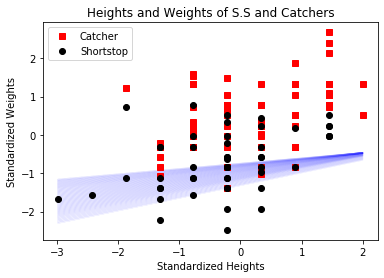

In [48]:
plot_convergence(x,ybsall,w_hist,b_hist,0.001,900,0.0001)